In [19]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing as pp

In [24]:
##Prepare data##

filename=r'drone_delivery.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['clientid'], axis=1)
data_train=data_train.dropna()
colnames = data_train.columns.get_values()
print(colnames)
print(data_train.head(10))

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')

X=data_train['x']
y=data_train['y']
print(data_train.shape)
print(y.shape)

['x' 'y']
            x           y
0  622.771572  164.857623
1  416.357298  630.193634
2  292.735020  567.333231
3  737.211288  166.225676
4  540.475375  682.912298
5  535.469492  318.439661
6  640.380050  870.833221
7  235.772075  359.048203
8  481.896884  661.491838
9  730.032789  312.177817

DESCRIBE DATA:
                  x            y
count  5956.000000  5956.000000
mean    508.823177   427.554772
std     271.061462   289.044640
min       0.017692     0.043285
25%     282.582920   170.079921
50%     518.100892   397.786441
75%     727.156497   669.982518
max     999.533215   999.731720
(5956, 2)
(5956,)


C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


In [3]:
   # Finalize and render the figure


# 1.

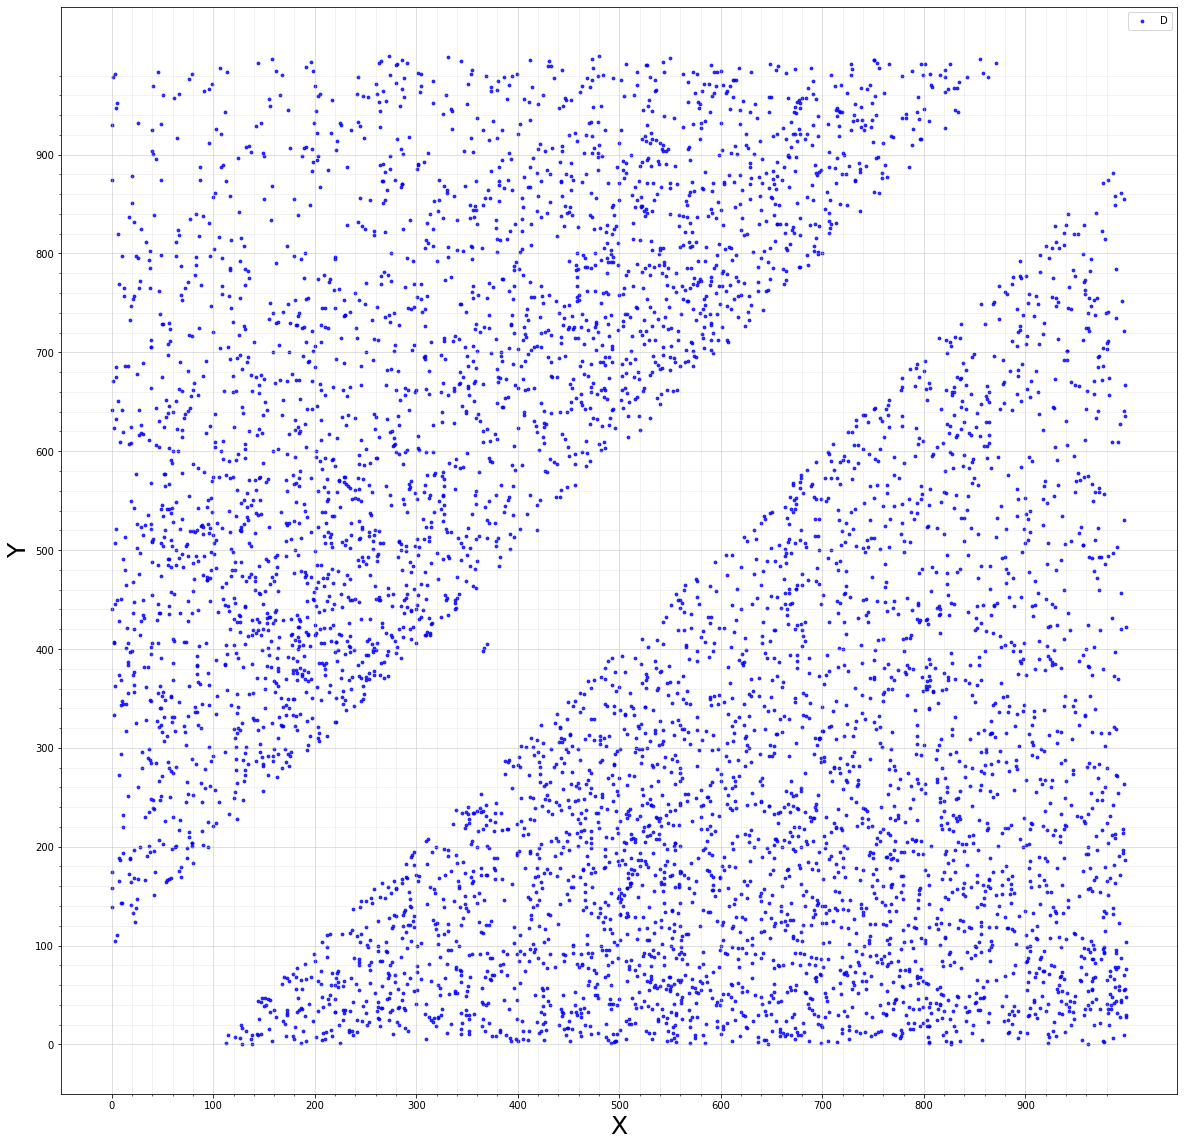

In [4]:
###SCATTER XY####

ax=data_train.plot(kind="scatter", x="x", y="y",
    s=8,
    c="blue", alpha=0.8, figsize=(20,20),
)


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.legend("Drone XYlllll")
plt.show()

#### checking optiaml amount of clasters

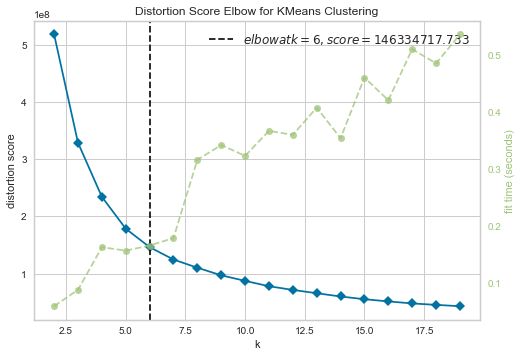

In [5]:
###Elbow method###
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(data_train)        # Fit the data to the visualizer
visualizer.show()   

# 2. and 3.

2 CLUSTERS:


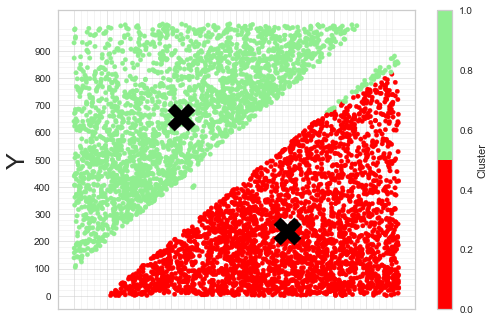

            x           y  Cluster
0  622.771572  164.857623        0
1  416.357298  630.193634        1
2  292.735020  567.333231        1
3  737.211288  166.225676        0
4  540.475375  682.912298        1
5  535.469492  318.439661        0
6  640.380050  870.833221        1
7  235.772075  359.048203        1
8  481.896884  661.491838        1
9  730.032789  312.177817        0

CENTROIDS:
             x           y
0  655.348904  238.149466
1  330.075990  658.610890

 ---------------------------------------------------------------------------------------------------- 

3 CLUSTERS:


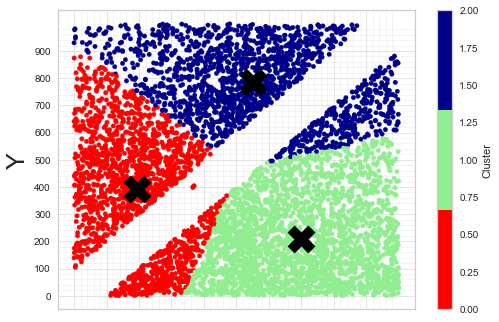

            x           y  Cluster
0  622.771572  164.857623        1
1  416.357298  630.193634        2
2  292.735020  567.333231        0
3  737.211288  166.225676        1
4  540.475375  682.912298        2
5  535.469492  318.439661        1
6  640.380050  870.833221        2
7  235.772075  359.048203        0
8  481.896884  661.491838        2
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  194.447252  390.876296
1  697.881097  210.190068
2  552.310399  787.176527

 ---------------------------------------------------------------------------------------------------- 

4 CLUSTERS:


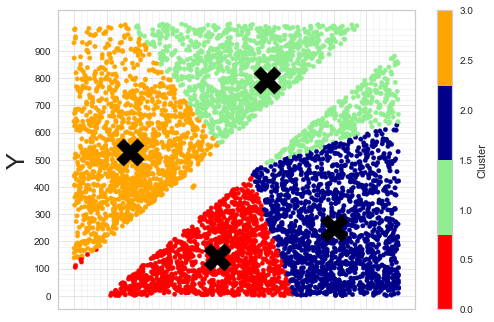

            x           y  Cluster
0  622.771572  164.857623        0
1  416.357298  630.193634        1
2  292.735020  567.333231        3
3  737.211288  166.225676        2
4  540.475375  682.912298        1
5  535.469492  318.439661        0
6  640.380050  870.833221        1
7  235.772075  359.048203        3
8  481.896884  661.491838        1
9  730.032789  312.177817        2

CENTROIDS:
             x           y
0  438.833368  140.591841
1  594.070499  792.521873
2  800.001611  248.681010
3  172.083943  530.088887

 ---------------------------------------------------------------------------------------------------- 

5 CLUSTERS:


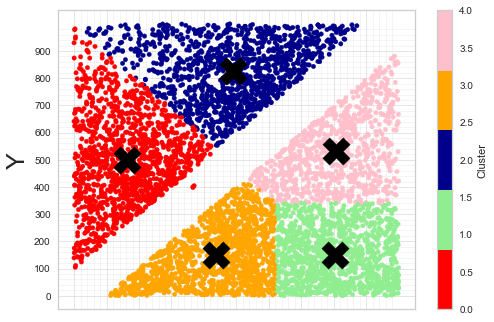

            x           y  Cluster
0  622.771572  164.857623        1
1  416.357298  630.193634        2
2  292.735020  567.333231        0
3  737.211288  166.225676        1
4  540.475375  682.912298        2
5  535.469492  318.439661        3
6  640.380050  870.833221        2
7  235.772075  359.048203        0
8  481.896884  661.491838        2
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  162.096947  498.637861
1  804.311514  151.253429
2  490.255759  825.958394
3  437.135629  148.416916
4  806.975790  530.928268

 ---------------------------------------------------------------------------------------------------- 

6 CLUSTERS:


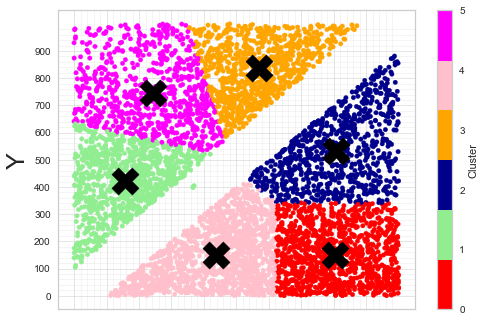

            x           y  Cluster
0  622.771572  164.857623        0
1  416.357298  630.193634        5
2  292.735020  567.333231        5
3  737.211288  166.225676        0
4  540.475375  682.912298        3
5  535.469492  318.439661        4
6  640.380050  870.833221        3
7  235.772075  359.048203        1
8  481.896884  661.491838        3
9  730.032789  312.177817        0

CENTROIDS:
             x           y
0  804.628217  151.319072
1  156.727602  421.437811
2  806.975790  530.928268
3  568.621722  836.205748
4  437.412801  148.363688
5  241.532028  744.237159

 ---------------------------------------------------------------------------------------------------- 

7 CLUSTERS:


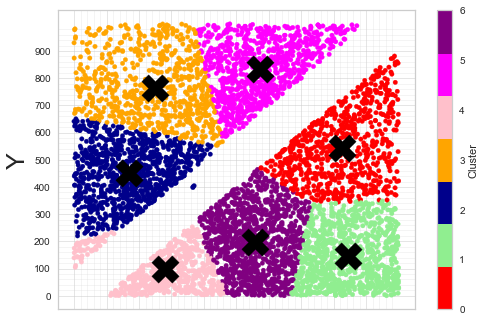

            x           y  Cluster
0  622.771572  164.857623        6
1  416.357298  630.193634        3
2  292.735020  567.333231        2
3  737.211288  166.225676        1
4  540.475375  682.912298        5
5  535.469492  318.439661        6
6  640.380050  870.833221        5
7  235.772075  359.048203        2
8  481.896884  661.491838        5
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  824.106092  544.951878
1  843.121726  144.383646
2  168.913574  449.882907
3  247.836210  765.621205
4  279.408339   96.620881
5  573.000103  835.275126
6  556.119683  199.214043

 ---------------------------------------------------------------------------------------------------- 



In [50]:
import time
###Making model####
trainSet = data_train

###K-Means clustering###FIT AND PREDICT
from sklearn import cluster
num_clusters = range(1,7)#How many iterations in for loop
k=2 #How many clusters
labelList=[]
for i in num_clusters:
   
    
    #centroids_df={}
    centroidHelper=data_train
    kmeans = cluster.KMeans(n_clusters=k,random_state=0,max_iter=1000)
    kmeans.fit(data_train)
    predict=kmeans.predict(data_train)

    centroids = kmeans.cluster_centers_

    filename="_DataClusters",str(1),".CSV"
    
    ###print dataframe with cluster ###
    centroidHelper['Cluster'] = pd.DataFrame(predict, index=centroidHelper.index)
    #data_train.to_excel(r'c', centroids = kmeans.cluster_centers_)
    

    

    #Centroids for plotting
    centroids_df = pd.DataFrame(centroids, columns=colnames)
    
    
    #SCATTER clusters in different colors
    if (i>0):
        print((k),"CLUSTERS:")
       
        labelList.append(str(i))
        #centroids_df = pd.DataFrame(centroids, columns=colnames)
        
        
        #print("TÄÄÄ",(k),centroids_df)    
        colors =  ['red','LightGreen','DarkBlue','orange','pink','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
        ax=data_train.plot(kind="scatter",x='x', y='y', c = 'Cluster', cmap = matplotlib.colors.ListedColormap(colors[:k]) )#,figsize=(15,15)


        ##Initializing grid
        major_ticks = np.arange(0, 1000, 100)
        minor_ticks = np.arange(0, 1000, 20)

        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)

        # And a corresponding grid
        ax.grid(which='both')

        # Or if you want different settings for the grids:
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
        plt.grid(True)
        plt.ylabel("Y", fontsize=25)
        plt.xlabel("X", fontsize=25)
                
        # Center points of clusters
        plt.scatter(centroids[:,0], centroids[:,1], marker="X", color='black',s=250*3)
                    # Plot 2
    
        plt.show()
        plt.close()
        
        print(data_train.head(10))
        print("\nCENTROIDS:\n",centroids_df)
        print('\n','-'*100,'\n')
        ##Reset cluster index
        centroidHelper.drop(['Cluster'],axis=1)
        data_train=data_train.drop(['Cluster'], axis=1)
        
        #Increase amount of clusters
        k=k+1
        

In [7]:
###FOR LATER USE###
###Cluster item count###
print("CLUSTER ITEM COUNT:")
print("Cluster 0 =",np.sum(predict==0))
print("Cluster 1 =",np.sum(predict==1))
print("Cluster 2 =",np.sum(predict==2))
print("Cluster 3 =",np.sum(predict==3))
print("Cluster 4 =",np.sum(predict==4))
print("Cluster 5 =",np.sum(predict==5))
print("Cluster 6 =",np.sum(predict==6))
print("Cluster 7 =",np.sum(predict==7))

CLUSTER ITEM COUNT:
Cluster 0 = 757
Cluster 1 = 921
Cluster 2 = 991
Cluster 3 = 720
Cluster 4 = 570
Cluster 5 = 867
Cluster 6 = 1130
Cluster 7 = 0


# 4.

# 5.

(5956, 2)
2 CLUSTERS:


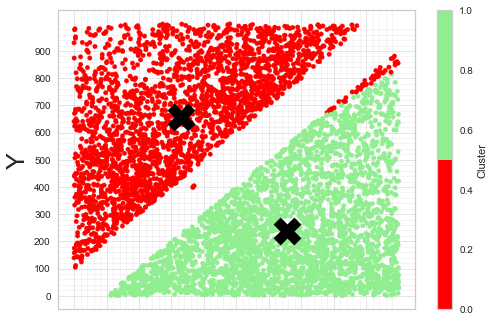

            x           y  Cluster
0  622.771572  164.857623        1
1  416.357298  630.193634        0
2  292.735020  567.333231        0
3  737.211288  166.225676        1
4  540.475375  682.912298        0
5  535.469492  318.439661        1
6  640.380050  870.833221        0
7  235.772075  359.048203        0
8  481.896884  661.491838        0
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  330.075990  658.610890
1  655.348904  238.149466

 ---------------------------------------------------------------------------------------------------- 

3 CLUSTERS:


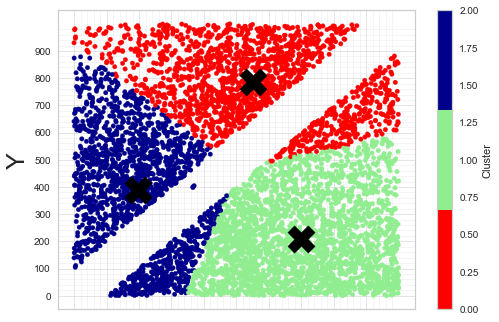

            x           y  Cluster
0  622.771572  164.857623        1
1  416.357298  630.193634        0
2  292.735020  567.333231        2
3  737.211288  166.225676        1
4  540.475375  682.912298        0
5  535.469492  318.439661        1
6  640.380050  870.833221        0
7  235.772075  359.048203        2
8  481.896884  661.491838        0
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  551.965879  786.181071
1  698.925143  209.559383
2  195.478653  389.264657

 ---------------------------------------------------------------------------------------------------- 

4 CLUSTERS:


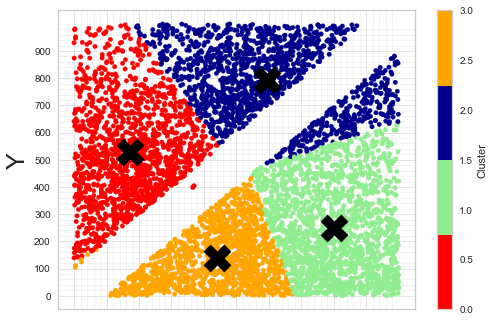

            x           y  Cluster
0  622.771572  164.857623        3
1  416.357298  630.193634        2
2  292.735020  567.333231        0
3  737.211288  166.225676        1
4  540.475375  682.912298        2
5  535.469492  318.439661        3
6  640.380050  870.833221        2
7  235.772075  359.048203        0
8  481.896884  661.491838        2
9  730.032789  312.177817        1

CENTROIDS:
             x           y
0  172.083943  530.088887
1  800.508349  249.709116
2  593.675252  792.802352
3  439.667676  140.243989

 ---------------------------------------------------------------------------------------------------- 

5 CLUSTERS:


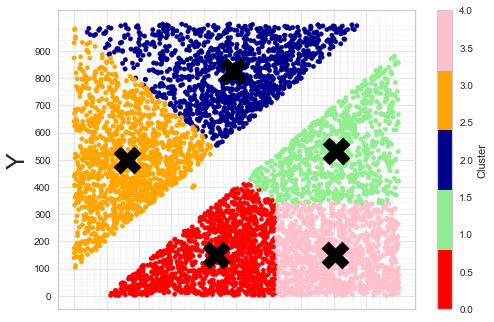

            x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        2
2  292.735020  567.333231        3
3  737.211288  166.225676        4
4  540.475375  682.912298        2
5  535.469492  318.439661        0
6  640.380050  870.833221        2
7  235.772075  359.048203        3
8  481.896884  661.491838        2
9  730.032789  312.177817        4

CENTROIDS:
             x           y
0  437.135629  148.416916
1  806.975790  530.928268
2  490.255759  825.958394
3  162.096947  498.637861
4  804.311514  151.253429

 ---------------------------------------------------------------------------------------------------- 

6 CLUSTERS:


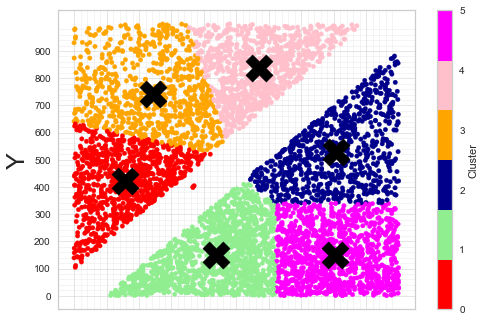

            x           y  Cluster
0  622.771572  164.857623        5
1  416.357298  630.193634        3
2  292.735020  567.333231        3
3  737.211288  166.225676        5
4  540.475375  682.912298        4
5  535.469492  318.439661        1
6  640.380050  870.833221        4
7  235.772075  359.048203        0
8  481.896884  661.491838        4
9  730.032789  312.177817        5

CENTROIDS:
             x           y
0  156.245428  420.853649
1  437.182259  148.028020
2  806.328264  530.317954
3  243.821685  742.914377
4  570.048125  837.516806
5  804.719056  151.155007

 ---------------------------------------------------------------------------------------------------- 

7 CLUSTERS:


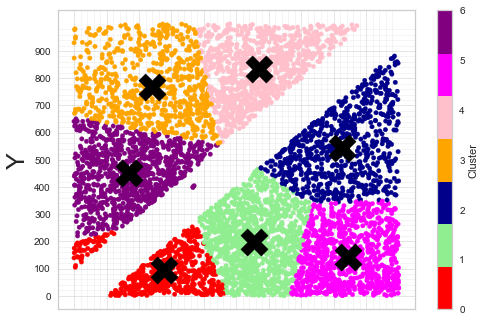

            x           y  Cluster
0  622.771572  164.857623        1
1  416.357298  630.193634        3
2  292.735020  567.333231        6
3  737.211288  166.225676        5
4  540.475375  682.912298        4
5  535.469492  318.439661        1
6  640.380050  870.833221        4
7  235.772075  359.048203        6
8  481.896884  661.491838        4
9  730.032789  312.177817        5

CENTROIDS:
             x           y
0  277.964999   96.052232
1  555.032202  199.227226
2  824.106092  544.951878
3  241.512023  768.768277
4  570.125563  832.235599
5  842.606913  144.226593
6  170.265854  450.064397

 ---------------------------------------------------------------------------------------------------- 



In [49]:
from sklearn import cluster
#num_clusters = 9
print(data_train.shape)
num_clusters = range(1,7)#How many iterations in for loop
k=2 #How many clusters
for i in num_clusters:
    centroids_df={}
    centroidHelper=data_train
    kmeans = cluster.KMeans(n_clusters=k,random_state=1,max_iter=1000)
    kmeans.fit(data_train)
    predict=kmeans.predict(data_train)

    centroids = kmeans.cluster_centers_

    filename="_DataClusters",str(1),".CSV"
    
    ###print dataframe with cluster ###
    centroidHelper['Cluster'] = pd.DataFrame(predict, index=centroidHelper.index)
    
    #Centroids for plotting
    centroids_df = pd.DataFrame(centroids, columns=colnames)
    
    
    #SCATTER clusters in different colors
    if (i>0):
        print((k),"CLUSTERS:")
        colors =  ['red','LightGreen','DarkBlue','orange','pink','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
        ax=data_train.plot(kind="scatter",x='x', y='y', c = 'Cluster', cmap = matplotlib.colors.ListedColormap(colors[:k]) )#,figsize=(15,15)


        ##Initializing grid
        major_ticks = np.arange(0, 1000, 100)
        minor_ticks = np.arange(0, 1000, 20)

        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)

        # And a corresponding grid
        ax.grid(which='both')

        # Or if you want different settings for the grids:
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
        plt.grid(True)
        plt.ylabel("Y", fontsize=25)
        plt.xlabel("X", fontsize=25)
                
        # Center points of clusters
        plt.scatter(centroids[:,0], centroids[:,1], marker="X", color='black',s=250*3)
                    # Plot 2
    
        plt.show()
        plt.close()
        
        print(data_train.head(10))
        print("\nCENTROIDS:\n",centroids_df)
        print('\n','-'*100,'\n')
        ##Reset cluster index
        centroidHelper.drop(['Cluster'],axis=1)
        data_train=data_train.drop(['Cluster'], axis=1)
        
        #Increase amount of clusters
        k=k+1
        

# 6.

(5956, 2)
2 LABELS:


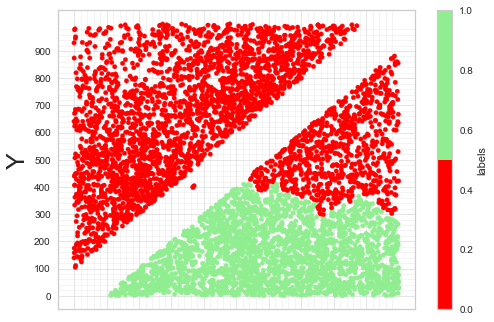

            x           y  labels
0  622.771572  164.857623       1
1  416.357298  630.193634       0
2  292.735020  567.333231       0
3  737.211288  166.225676       1
4  540.475375  682.912298       0
5  535.469492  318.439661       1
6  640.380050  870.833221       0
7  235.772075  359.048203       0
8  481.896884  661.491838       0
9  730.032789  312.177817       1
[1 0 0 ... 0 0 1]

 ---------------------------------------------------------------------------------------------------- 

(5956, 2)
3 LABELS:


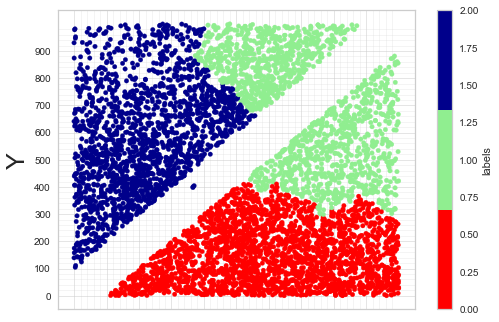

            x           y  labels
0  622.771572  164.857623       0
1  416.357298  630.193634       2
2  292.735020  567.333231       2
3  737.211288  166.225676       0
4  540.475375  682.912298       1
5  535.469492  318.439661       0
6  640.380050  870.833221       1
7  235.772075  359.048203       2
8  481.896884  661.491838       2
9  730.032789  312.177817       0
[0 2 2 ... 2 1 0]

 ---------------------------------------------------------------------------------------------------- 

(5956, 2)
4 LABELS:


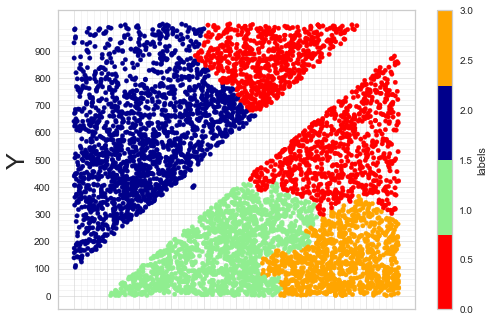

            x           y  labels
0  622.771572  164.857623       3
1  416.357298  630.193634       2
2  292.735020  567.333231       2
3  737.211288  166.225676       3
4  540.475375  682.912298       0
5  535.469492  318.439661       1
6  640.380050  870.833221       0
7  235.772075  359.048203       2
8  481.896884  661.491838       2
9  730.032789  312.177817       1
[3 2 2 ... 2 0 1]

 ---------------------------------------------------------------------------------------------------- 

(5956, 2)
5 LABELS:


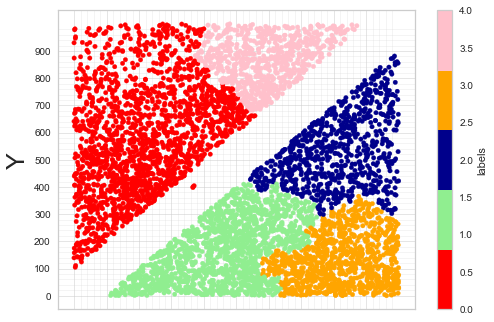

            x           y  labels
0  622.771572  164.857623       3
1  416.357298  630.193634       0
2  292.735020  567.333231       0
3  737.211288  166.225676       3
4  540.475375  682.912298       4
5  535.469492  318.439661       1
6  640.380050  870.833221       4
7  235.772075  359.048203       0
8  481.896884  661.491838       0
9  730.032789  312.177817       1
[3 0 0 ... 0 2 1]

 ---------------------------------------------------------------------------------------------------- 

(5956, 2)
6 LABELS:


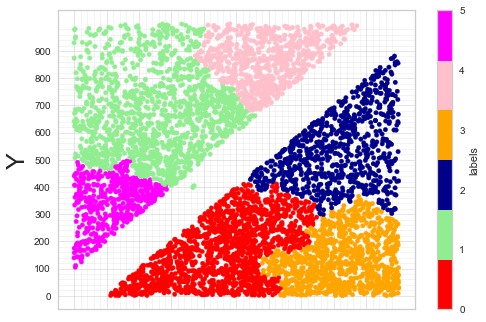

            x           y  labels
0  622.771572  164.857623       3
1  416.357298  630.193634       1
2  292.735020  567.333231       1
3  737.211288  166.225676       3
4  540.475375  682.912298       4
5  535.469492  318.439661       0
6  640.380050  870.833221       4
7  235.772075  359.048203       5
8  481.896884  661.491838       1
9  730.032789  312.177817       0
[3 1 1 ... 1 2 0]

 ---------------------------------------------------------------------------------------------------- 

(5956, 2)
7 LABELS:


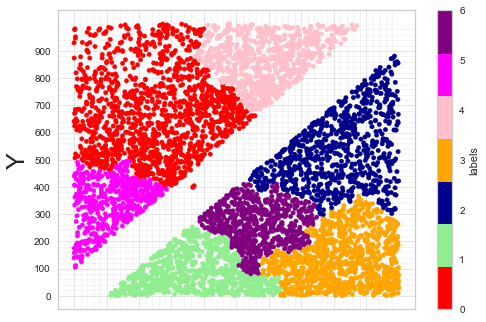

            x           y  labels
0  622.771572  164.857623       3
1  416.357298  630.193634       0
2  292.735020  567.333231       0
3  737.211288  166.225676       3
4  540.475375  682.912298       4
5  535.469492  318.439661       6
6  640.380050  870.833221       4
7  235.772075  359.048203       5
8  481.896884  661.491838       0
9  730.032789  312.177817       6
[3 0 0 ... 0 2 6]

 ---------------------------------------------------------------------------------------------------- 



In [48]:
#data_train = data_train.drop('Cluster', axis=1)
from sklearn import cluster
#num_clusters = 7
num_clusters = range(1,7)#How many iterations in for loop
k=2 #How many clusters
for i in num_clusters:
    print(data_train.shape)
    centroids_df={}
    centroidHelper=data_train
    Agglo = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    Agglo.fit(data_train)
    labels = Agglo.labels_
    data_train['labels'] = labels
    
    #Centroids for plotting
    centroids_df = pd.DataFrame(centroids, columns=colnames)
    
    
    #SCATTER clusters in different colors
    if (i>0):
        print((k),"LABELS:")
        colors =  ['red','LightGreen','DarkBlue','orange','pink','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
        ax=data_train.plot(kind="scatter",x='x', y='y',c = 'labels', cmap = matplotlib.colors.ListedColormap(colors[:k]) )#,figsize=(15,15)


        ##Initializing grid
        major_ticks = np.arange(0, 1000, 100)
        minor_ticks = np.arange(0, 1000, 20)

        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)

        # And a corresponding grid
        ax.grid(which='both')

        # Or if you want different settings for the grids:
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
        plt.grid(True)
        plt.ylabel("Y", fontsize=25)
        plt.xlabel("X", fontsize=25)
                
        # Center points of clusters
        #plt.scatter(centroids[:,0], centroids[:,1], marker="X", color='black',s=250*3)
                    # Plot 2
    
        plt.show()
        plt.close()
        
        print(data_train.head(10))
        print(labels)
        print('\n','-'*100,'\n')
        
        ##Reset cluster index
        centroidHelper.drop(['labels'],axis=1)
        data_train=data_train.drop(['labels'], axis=1)
        
        #Increase amount of clusters
        k=k+1
        